## Automaded Dialogue Games

### Authors: Stefan Sarkadi and Ionut Moraru
#### AAAI2020

Two agents, Deceiver (DEC), and an Interrogator (INT) take part in a dialogue game based on a World Graph (WG). Both agents have a knowledge base (KB) and a Theory of Mind of each other (ToM). The goal of DEC $G_{Dec}$ is to make INT infer the wrong color of the nodes that make up the WG.

The social parameters that influence the interaction between the two agents are the following:

1) Trust

2) Cognitive Load

3) Communicative skill (Cognitive resources)

4) Rewards for both agents + rewards calculated by the game

The actions that INT can perform are accept/reject argument provided by DEC, ask DEC about colour of a node.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import count

[<networkx.classes.digraph.DiGraph object at 0x7f2965ca3b90>,    myvalue
ID        
A   group1
C   group3
B   group2
E   group2
D   group1
G   group1
F   group3
I   group3
H   group2
K   group2
J   group1
M   group5
L   group3]


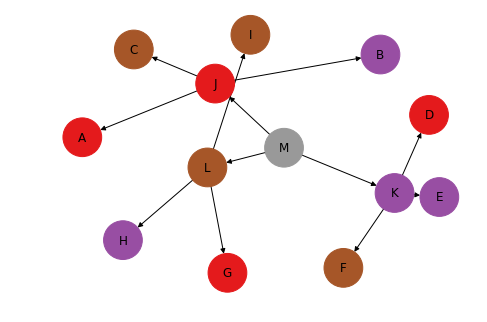

In [29]:
#graph1
df1 = pd.DataFrame({ 'from':['A', 'A', 'A', 'B', 'B', 'C', 'D', 'D', 'E', 'F', 'F', 'F', 'G'],
                       'to':['B', 'C', 'D', 'E', 'F', 'F', 'F', 'G', 'H', 'H', 'I', 'J', 'J']})
carac1 = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E','F','G','H','I','J'], 
                       'myvalue':['group1','group2','group3','group4','group3',
                                  'group4','group2','group4','group3','group2'] })

transitionSystem = [()]

#graph 2
df2 = pd.DataFrame({ 'from':['A', 'B', 'C','D','D','D','E','F','G','H'], 
                       'to':['D', 'D', 'D','E','F','G','H','H','H','I']})
carac2 = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E','F','G','H','I'], 'myvalue':['group2','group3','group4', 'group1', 'group2','group3','group4', 'group1', 'group5' ] })

#graph3 NN Style
df3 = pd.DataFrame({ 'from':['A', 'B', 'C','D','E','F','G','H','I','J','K','L'], 
                       'to':['J', 'J', 'J','K','K','K','L','L','L','M','M','M']})
carac3 = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E','F','G','H','I','J','K','L','M'], 'myvalue':['group1','group2','group3','group1','group2','group3','group1','group2','group3','group1','group2','group3','group5'] })

df4 = pd.DataFrame({ 'from':['J', 'J', 'J','K','K','K','L','L','L','M','M','M'],
                       'to':['A', 'B', 'C','D','E','F','G','H','I','J','K','L']})


print(makeAndPlotGraph(df4, carac3))

In [20]:
# method that draws a graph and then returns the graph and the characs.

def makeAndPlotGraph(df, carac):
    G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
    G.nodes()
    carac= carac.set_index('ID')
    carac=carac.reindex(G.nodes())
    carac['myvalue']=pd.Categorical(carac['myvalue'])
    carac['myvalue'].cat.codes
    nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)
    return [G, carac]